In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

PATH = "/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/02_FORMACAO_DE_IMAGENS/"
PATH_IMG = "/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/IMAGENS/"

os.chdir(PATH)
os.listdir()

['Formacao_de_imagens.ipynb']

In [4]:
def deg_to_rad(deg):
  return deg * np.pi / 180.

def rad_to_deg(rad):
  return rad * 180. / np.pi

# Mudar para ser uma matriz de vez um vetor
def rotacao_2D(angulo):
    return np.array([[np.cos(angulo), -np.sin(angulo)], [np.sin(angulo), np.cos(angulo)]])

def MatrixTransformacao(ponto, S, angulo, t):
    return np.array([[S[0]*np.cos(angulo), -np.sin(angulo), t[0]], [np.sin(angulo), S[1]*np.cos(angulo), t[1]], [0, 0, 1]]) @ ponto

def MatrixTransformacaoInversa(ponto, S, angulo, t):
    return np.linalg.inv(np.array([[S[0]*np.cos(angulo), -np.sin(angulo), t[0]], [np.sin(angulo), S[1]*np.cos(angulo), t[1]], [0, 0, 1]])) @ ponto

def MatrixProjecao(Xw, resolucao, f, dimensions, s):
    fx = f * resolucao[0] / dimensions[0]
    fy = f * resolucao[1] / dimensions[1]

    cx = resolucao[0] / 2
    cy = resolucao[1] / 2

    return np.array([[fx, s, cx], [0, fy, cy], [0, 0, 1]])

# Translação

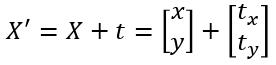

* $X$: Vetor Coluna do Ponto Original;
* $t$: Vetor coluna do deslocamento.

[[3]
 [4]]


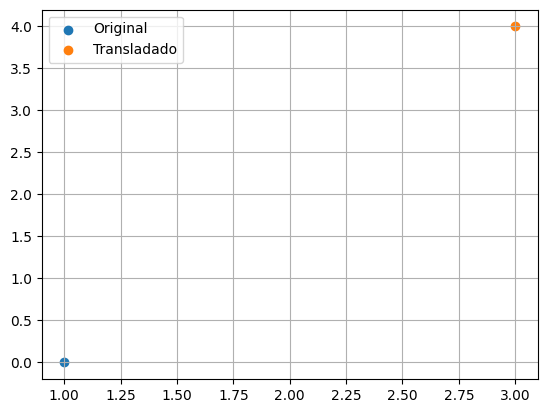

In [15]:
X = np.array([[1],[0]])
t = np.array([[2],[4]])

Xnew = X + t

print(Xnew)

plt.scatter(X[0],X[1], label="Original")
plt.scatter(Xnew[0],Xnew[1], label="Transladado")
plt.grid()
plt.legend()

plt.show()

# Rotação

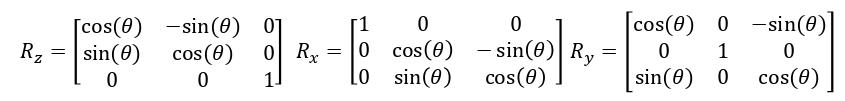

$X' = R_{x|y|z} \cdot X$

* $R_{x|y|z}$: Matriz Rotação de algum dos eixos;
* $X$: Vetor Coluna do ponto.

p1 = [[2], [4]]
p1 = [[-4.], [2.]]


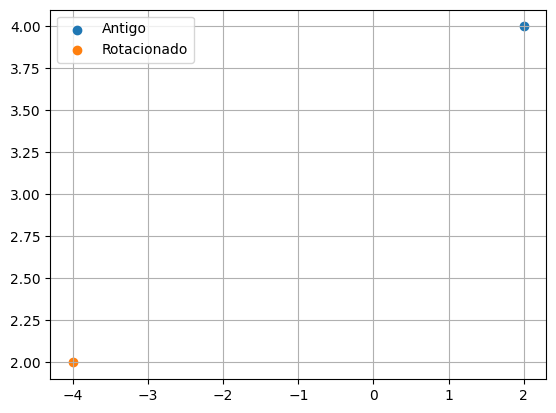

In [7]:
p1 = [[2],[4]]
p2 = rotacao_2D(deg_to_rad(90)) @ p1

print(f'p1 = [{p1[0]}, {p1[1]}]')
print(f'p1 = [{p2[0]}, {p2[1]}]')

plt.scatter(p1[0], p1[1], label='Antigo')
plt.scatter(p2[0], p2[1], label='Rotacionado')
plt.grid()
plt.legend()

plt.show()

[-2.5  4.3  1. ]
[2. 4. 1.]


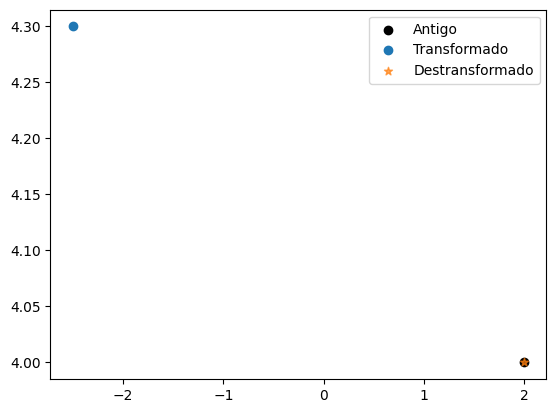

In [ ]:
k = 1
ponto = np.array([2/k, 4/k, k])

x = MatrixTransformacao(ponto=ponto.transpose(), S=[1,1], angulo=np.pi/2, t=[1.5, 2.3])
print(x)

x_destransformado = MatrixTransformacaoInversa(ponto=x, S=[1,1], angulo=np.pi/2, t=[1.5, 2.3])
print(x_destransformado)

plt.scatter((ponto[0]), ponto[1], label="Antigo", color='black')
plt.scatter((x[0]), x[1], label="Transformado")
plt.scatter((x_destransformado[0]), x_destransformado[1], label="Destransformado", marker='*', alpha=0.7)
# plt.grid()
plt.legend()
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])

plt.show()

In [ ]:
# Concluir a atividade, ler os slides

Xw = np.array([2, 1, 3])

teste = MatrixProjecao(Xw.transpose, [640,480], 1000, [640,480], 0)
print(teste)

[[1000.    0.  320.]
 [   0. 1000.  240.]
 [   0.    0.    1.]]
